<music21.stream.iterator.StreamIterator for Score:0x125b905f8 @:0>


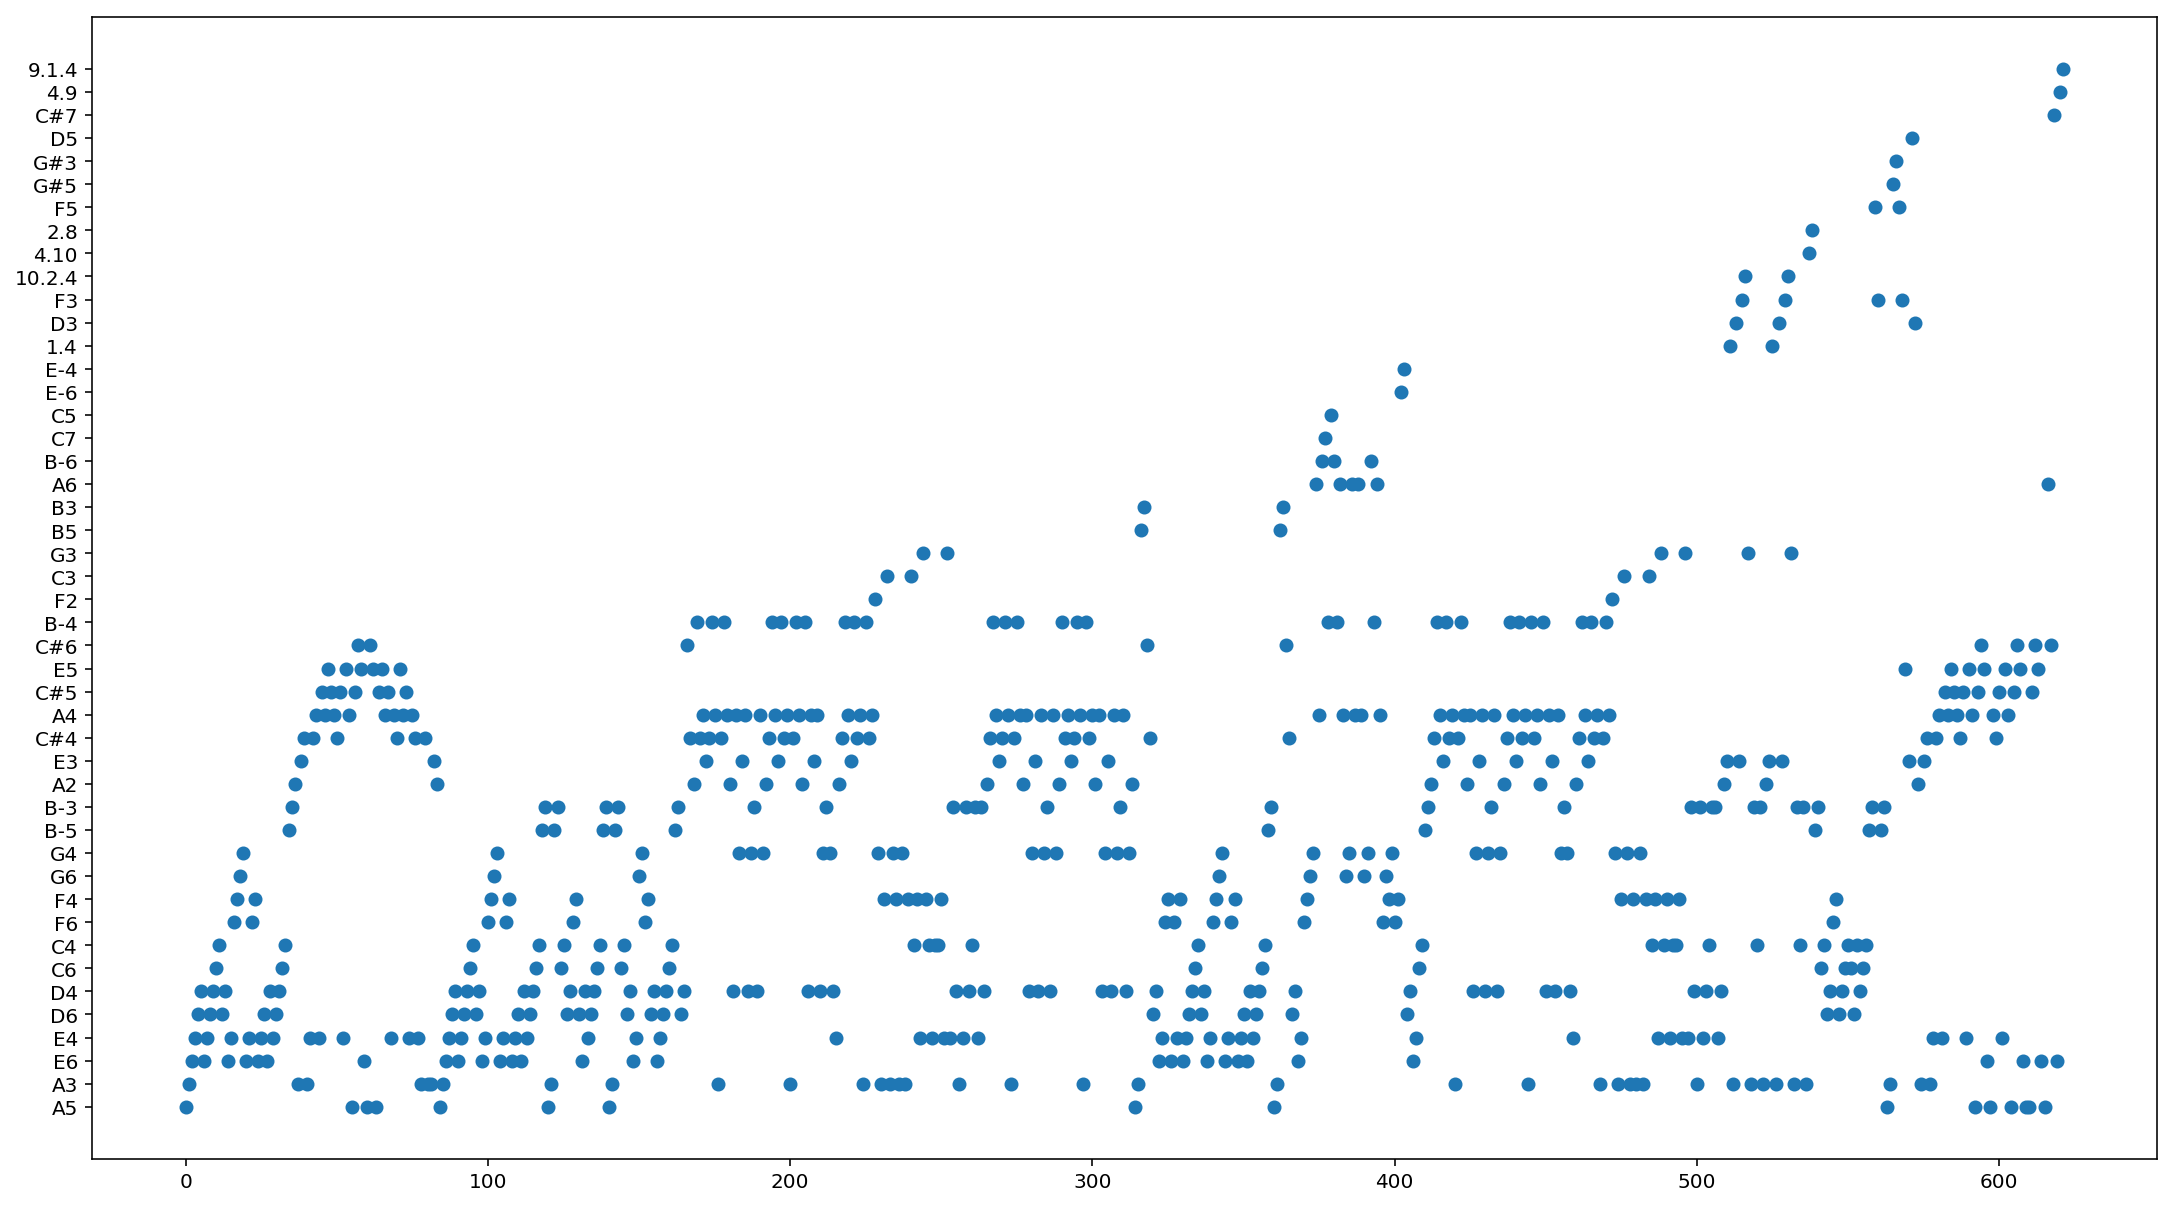

In [3]:
import numpy
import matplotlib.pyplot as plt
from music21 import converter, instrument, note, chord
import keras
from keras.utils import np_utils

notes = []
midi = converter.parse("alb_esp1.mid")
notes_to_parse = None
duration = []
parts = instrument.partitionByInstrument(midi)
if parts: # file has instrument parts
    notes_to_parse = parts.parts[0].recurse()
    print(parts.parts)
else: # file has notes in a flat structure
    notes_to_parse = midi.flat.notes
for element in notes_to_parse:
    if isinstance(element, note.Note):
        notes.append(str(element.pitch))
        duration.append(element.quarterLength)
    elif isinstance(element, chord.Chord):
        notes.append('.'.join(str(n) for n in element.normalOrder))
plt.figure(figsize = (18.5, 10.5))
plt.scatter([x for x in range(len(notes))],notes)


def prepare_sequences(notes, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    sequence_length = 100

    # get all pitch names
    pitchnames = sorted(set(item for item in notes))

     # create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        network_output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    network_input = network_input / float(n_vocab)

    network_output = np_utils.to_categorical(network_output)

    return (network_input, network_output)

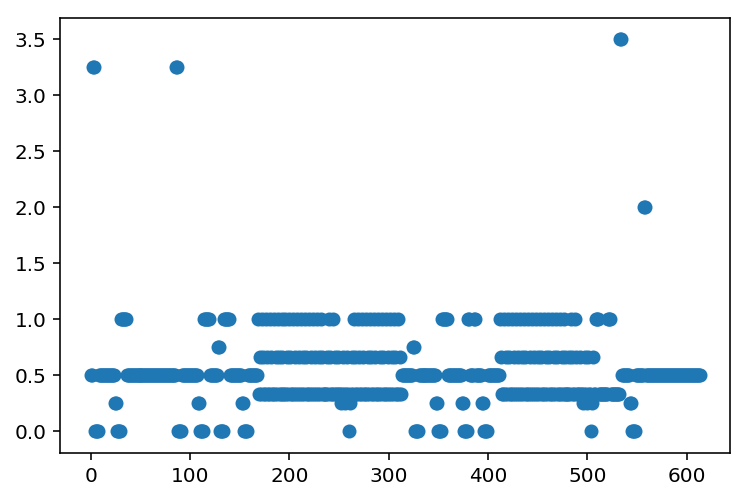

In [2]:
plt.scatter([x for x in range(len(duration))],duration)